In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import numpy as np


import os
import sys

In [191]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [192]:
from scripts.db_connection import fetch_data_from_db
query = "SELECT * FROM xdr_data;"
# from scripts import db_connection.fetch_data_from_db(query)
df = fetch_data_from_db(query)

c:\Users\Coop\Desktop\10 Acadamy\TellCo-Telecom-Analysis-Dashboard\scripts\db_connection.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [193]:
df.head(5)

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [194]:
df.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count            150000.000000  ...        1.500010e+05        1.500010e+05   
mean              13300.045927  ...        1.163407e+07        1.100941e+07   
std               23971.878541  ...        6.710569e+06        6.345423e+06   
min                   0.000000  ...        5.300000e+01        1.050000e+02   
25%                  43.000000  ...        5.833501e+06        5.517965e+06   
50%                  63.000000  ...        1.161602e+07        1.101345e+07   
75%               19710.750000  ...        1.744852e+07        1.651556e+07   
max              378160.000000  ...        2.325910e+07        2.201196e+07   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       4.220447e+08   
std          6.725218e+06        6.359490e+06       2.439675e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.777156e+06        5.475981e+06       2.104733e+08   
50%          1.164222e+07        1.099638e+07       4.234081e+08   
75%          1.747048e+07        1.650727e+07       6.331742e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.500010e+05      1.500010e+05      1.500010e+05   
mean        8.288398e+06      4.211005e+08      8.264799e+06   
std         4.782700e+06      2.432050e+08      4.769004e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.128476e+06      2.101869e+08      4.145943e+06   
50%         8.291208e+06      4.218030e+08      8.267071e+06   
75%         1.243162e+07      6.316918e+08      1.238415e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500000e+05      1.500000e+05  
mean       4.112121e+07      4.546434e+08  
std        1.127639e+07      2.441429e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322201e+07      2.431068e+08  
50%        4.114331e+07      4.558411e+08  
75%        4.903424e+07      6.657055e+08  
max        7.833131e+07      9.029696e+08  

[8 rows x 50 columns]

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Task 1 - User Overview Analysis 


In [196]:
top_handsets = df['Handset Type'].value_counts().head(10)
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

In [197]:
print(top_handsets)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [198]:
print(top_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [199]:
top_5_per_manufacturer = {}
for manufacturer in top_manufacturers.index:
    top_handsets_for_manufacturer = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_per_manufacturer[manufacturer] = top_handsets_for_manufacturer
print(top_5_per_manufacturer)


{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


In [200]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [201]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])  # Only show columns with missing values


Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

## Before removing missing values

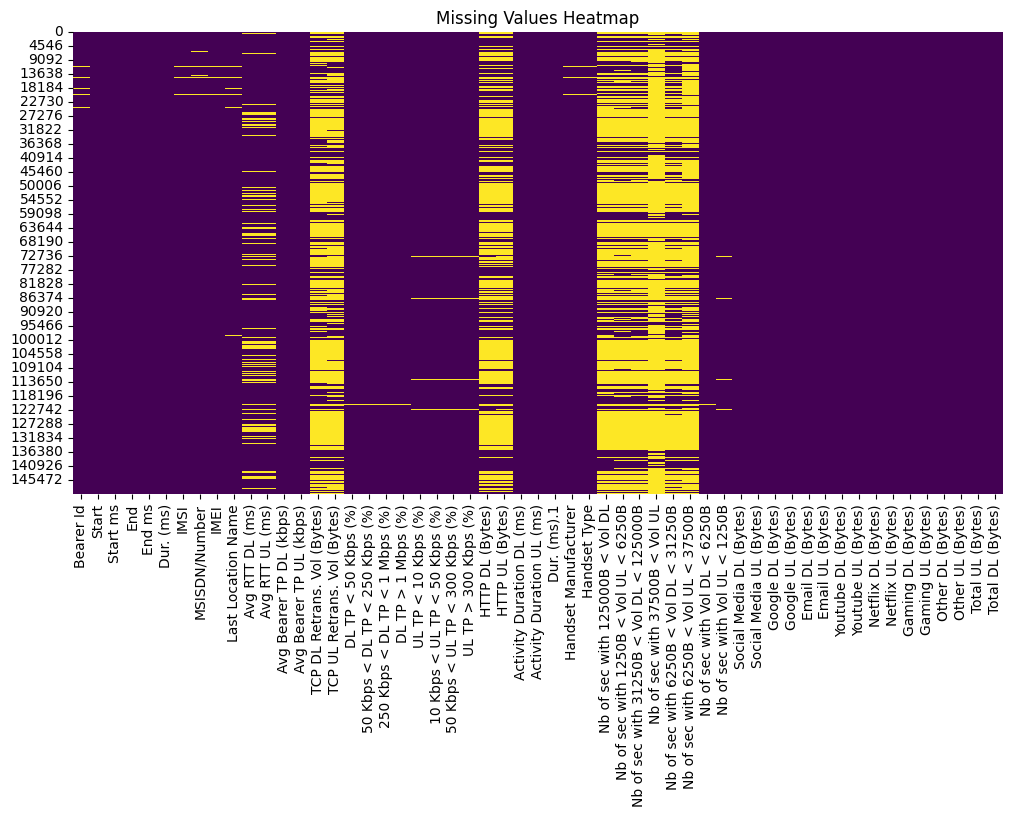

In [202]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## Droping missing values

In [203]:
df_cleaned = df.dropna()

# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# # print("Numeric columns:\n", numeric_cols)
# # Replace missing values with the mean for numeric columns
# for col in numeric_cols:
#     mean_value = df[col].mean()  # Calculate mean for the column
#     df[col].fillna(mean_value, inplace=True)  # Replace NA with mean

# # Verify that there are no more missing values
# missing_values_after = df.isnull().sum()
# print("Missing values after replacing with mean:\n", missing_values_after)


In [204]:
df_cleaned.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

## After Removing missing values

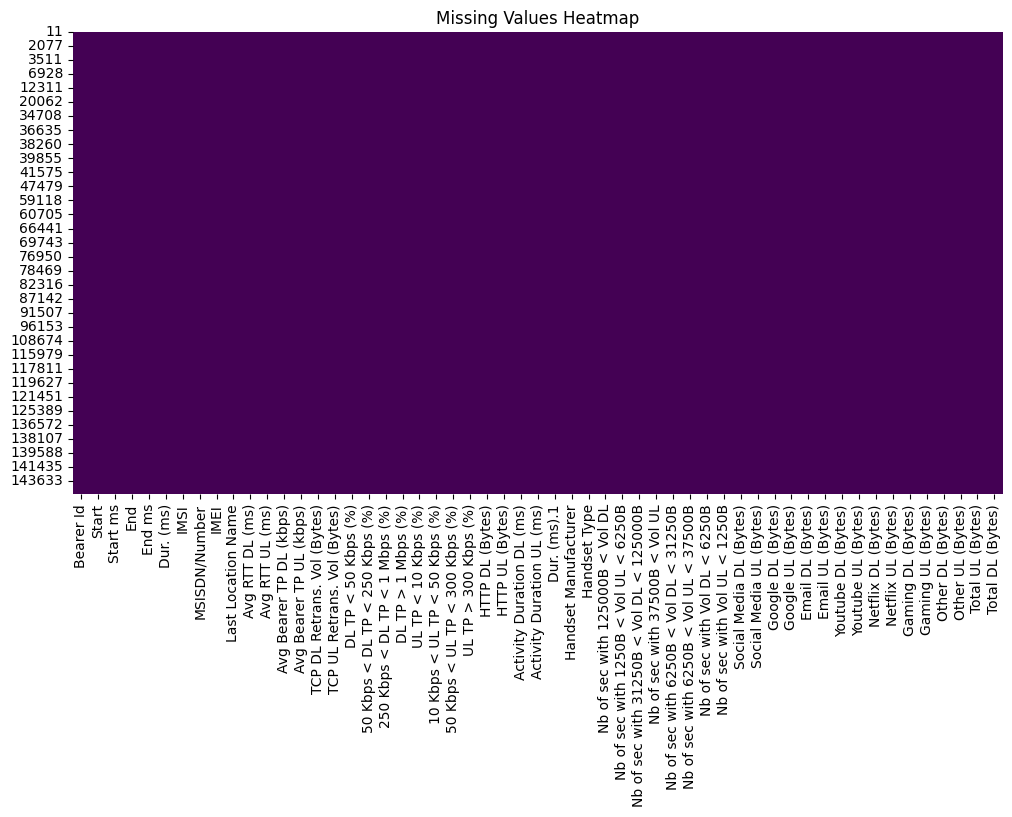

In [205]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [206]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))  # Select numerical columns
abs_z_scores = abs(z_scores)

# Define a threshold (commonly 3)
threshold = 3
outliers = (abs_z_scores > threshold)

# Get outlier rows
outlier_rows = df[(outliers).any(axis=1)]
print(outlier_rows)


Empty DataFrame
Columns: [Bearer Id, Start, Start ms, End, End ms, Dur. (ms), IMSI, MSISDN/Number, IMEI, Last Location Name, Avg RTT DL (ms), Avg RTT UL (ms), Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps), TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), DL TP < 50 Kbps (%), 50 Kbps < DL TP < 250 Kbps (%), 250 Kbps < DL TP < 1 Mbps (%), DL TP > 1 Mbps (%), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%), 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%), HTTP DL (Bytes), HTTP UL (Bytes), Activity Duration DL (ms), Activity Duration UL (ms), Dur. (ms).1, Handset Manufacturer, Handset Type, Nb of sec with 125000B < Vol DL, Nb of sec with 1250B < Vol UL < 6250B, Nb of sec with 31250B < Vol DL < 125000B, Nb of sec with 37500B < Vol UL, Nb of sec with 6250B < Vol DL < 31250B, Nb of sec with 6250B < Vol UL < 37500B, Nb of sec with Vol DL < 6250B, Nb of sec with Vol UL < 1250B, Social Media DL (Bytes), Social Media UL (Bytes), Google DL (Bytes), Google UL (Bytes), Email DL (

In [207]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

## Identifying Outliers

In [208]:
from scripts.tell_analysis import identify_outliers_iqr

# Identify outliers in the dataset
outlier_indices = identify_outliers_iqr(df)
print(f'Total outliers detected: {len(set(outlier_indices))}')


Column: Bearer Id
Outliers: 0
Lower Bound: -1.188930851051389e+18, Upper Bound: 2.1581240076962955e+19
------------------------------
Column: Start ms
Outliers: 0
Lower Bound: -498.5, Upper Bound: 1497.5
------------------------------
Column: End ms
Outliers: 0
Lower Bound: -497.5, Upper Bound: 1498.5
------------------------------
Column: Dur. (ms)
Outliers: 7184
Lower Bound: -55044.125, Upper Bound: 244914.875
------------------------------
Column: IMSI
Outliers: 13250
Lower Bound: 208200845729468.0, Upper Bound: 208202327152884.0
------------------------------
Column: MSISDN/Number
Outliers: 24130
Lower Bound: 33603002800.25, Upper Bound: 33731783550.25
------------------------------
Column: IMEI
Outliers: 0
Lower Bound: -40527784848832.0, Upper Bound: 162108198389224.0
------------------------------
Column: Avg RTT DL (ms)
Outliers: 14059
Lower Bound: -25.0, Upper Bound: 127.0
------------------------------
Column: Avg RTT UL (ms)
Outliers: 11243
Lower Bound: -17.5, Upper Bound: 34

In [209]:
df_cleaned

Bearer Id            Start  Start ms              End  End ms  \
11      1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
20      1.304243e+19   4/17/2019 0:35     363.0   4/25/2019 4:52   691.0   
68      1.304243e+19  4/21/2019 10:09       1.0   4/25/2019 1:39   272.0   
78      1.304243e+19  4/21/2019 19:35     344.0   4/25/2019 2:59   259.0   
84      1.304243e+19   4/22/2019 1:17     301.0   4/25/2019 1:17   938.0   
...              ...              ...       ...              ...     ...   
149935  1.304243e+19   4/29/2019 7:28     312.0   4/30/2019 7:28   218.0   
149951  1.304243e+19   4/29/2019 7:28     728.0   4/30/2019 7:28   643.0   
149968  1.304243e+19   4/29/2019 7:28     131.0   4/30/2019 7:08   257.0   
149973  7.277826e+18   4/29/2019 7:28     548.0   4/30/2019 7:28   451.0   
149990  1.304243e+19   4/29/2019 7:28     438.0   4/30/2019 6:46    83.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
11       889834.0  2.082019e+14   3.366447e+10  8.600910e+13   
20       706649.0  2.082010e+14   3.365875e+10  8.654080e+13   
68       314961.0  2.082014e+14   3.366274e+10  3.528141e+13   
78       285833.0  2.082018e+14   3.366917e+10  3.566261e+13   
84       259201.0  2.082014e+14   3.366555e+10  8.637690e+13   
...           ...           ...            ...           ...   
149935    86399.0  2.082014e+14   3.366396e+10  8.637690e+13   
149951    86399.0  2.082014e+14   3.366513e+10  8.637690e+13   
149968    85215.0  2.082014e+14   3.365069e+10  3.536981e+13   
149973    86399.0  2.082010e+14   3.366856e+10  8.654080e+13   
149990    83844.0  2.082014e+14   3.376127e+10  3.532701e+13   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
11                T21335C  ...           2805710.0          16817598.0   
20                T29714B  ...          15782415.0           9688165.0   
68                T72937C  ...          22191188.0          18851898.0   
78                L41432B  ...          14655680.0             26061.0   
84                T85779A  ...             69288.0          19177045.0   
...                   ...  ...                 ...                 ...   
149935            T29891A  ...           6610042.0            984596.0   
149951            T73896C  ...            267363.0          10381499.0   
149968            L53329B  ...           5116849.0          21068795.0   
149973            T73780B  ...           7347338.0           1585640.0   
149990            D70706A  ...           8402539.0            899942.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
11              18094847.0           2029991.0        504604946.0   
20              18625220.0          14679856.0        373953102.0   
68              15879318.0          10650621.0         48891264.0   
78               5444485.0          17740302.0        164451149.0   
84              10783199.0           8000048.0        496879416.0   
...                    ...                 ...                ...   
149935          18826490.0           6017956.0        395964234.0   
149951          22890549.0          14878522.0        102822680.0   
149968          22559018.0          15263948.0        657274584.0   
149973          18726138.0          16090030.0        308033327.0   
149990           2029635.0           3443119.0        365096332.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
11              1063672.0       526987098.0        11382619.0   
20               574875.0       161357015.0          134689.0   
68             13607386.0       525208955.0         6472727.0   
78              6446720.0       415002189.0         4883208.0   
84              1530545.0       247233250.0         1175435.0   
...                   ...               ...               ...   
149935          4501221.0       771516975.0         3904640.0   
149951          2732534.0       666772734.0        10601725.0   
149968          3569715.0 

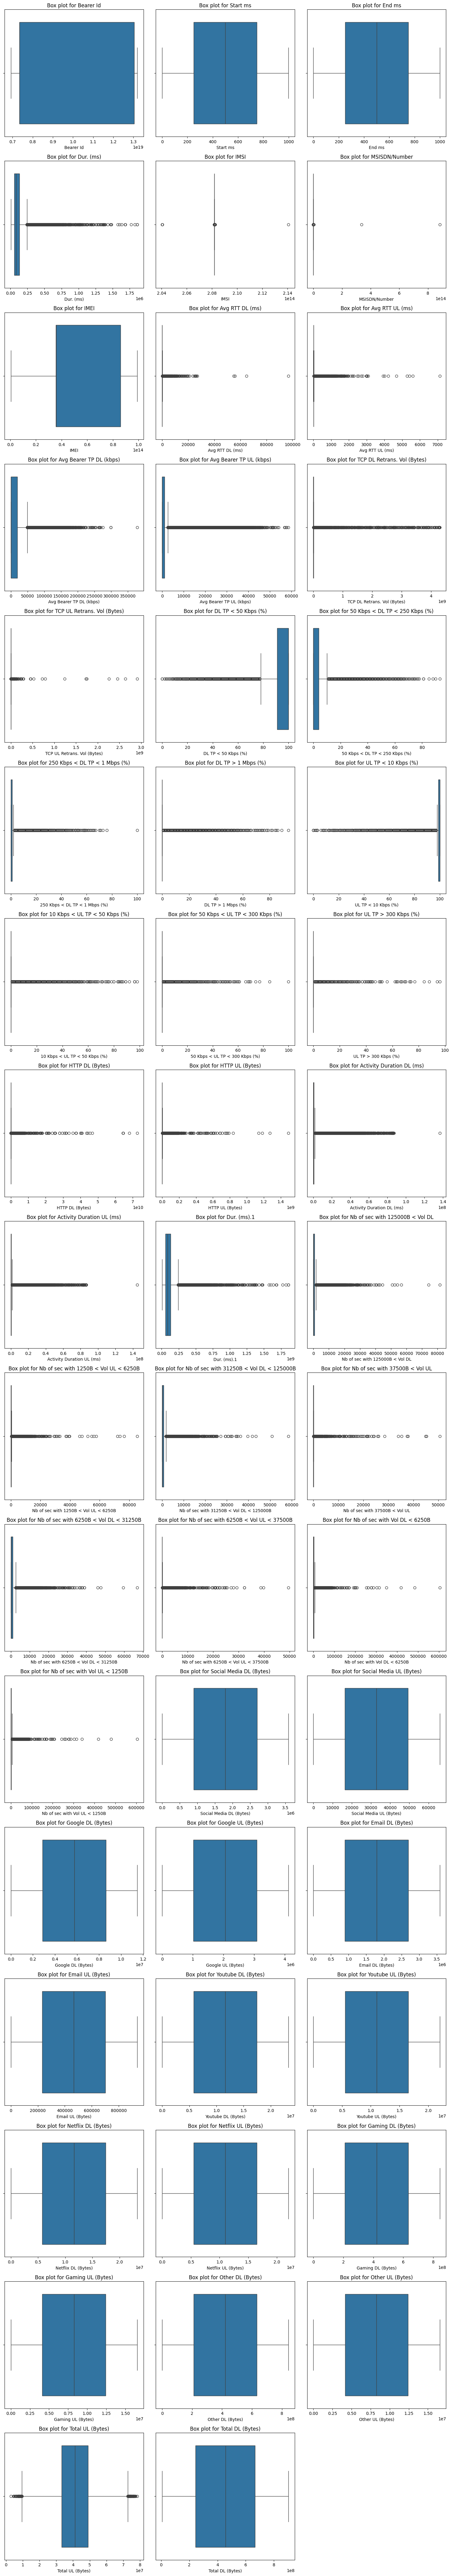

In [210]:
def visualize_outlies(df):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Calculate the number of rows and columns for the subplot grid
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(15, 5 * num_rows))  # Adjusting the figure size

    for i, col in enumerate(numerical_cols):
        plt.subplot(num_rows, num_cols, i + 1)  # Creating subplots
        sns.boxplot(x=df[col])  # Boxplot for each numerical column
        plt.title(f'Box plot for {col}')  # Title for each subplot

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots
    
visualize_outlies(df)


## Removing Outliers

In [211]:
# Remove outliers from the dataset
df_cleaned = df[~df.index.isin(set(outlier_indices))]
print(f'Dataset shape after removing outliers: {df_cleaned.shape}')

Dataset shape after removing outliers: (64217, 55)


In [212]:
df_cleaned.head(5)

Bearer Id           Start  Start ms             End  End ms  Dur. (ms)  \
92  1.311448e+19  4/22/2019 5:18     467.0  4/25/2019 0:56   829.0   243504.0   
93  1.311448e+19  4/22/2019 6:18     641.0  4/25/2019 0:01   444.0   236570.0   
95  1.311448e+19  4/22/2019 7:38     804.0  4/25/2019 0:01   199.0   231780.0   
96  1.311448e+19  4/22/2019 7:54     676.0  4/25/2019 0:01   176.0   230839.0   
97  7.349883e+18  4/22/2019 8:00     810.0  4/25/2019 2:22   294.0   238915.0   

            IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
92  2.082018e+14   3.368542e+10  3.556251e+13            D92937B  ...   
93  2.082021e+14   3.366132e+10  3.530731e+13            D73605A  ...   
95  2.082017e+14   3.361513e+10  3.520031e+13            L73684B  ...   
96  2.082014e+14   3.366495e+10  8.636750e+13            D73608B  ...   
97  2.082010e+14   3.366403e+10  3.586111e+13            D73605A  ...   

    Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
92          17400892.0          14644405.0           7682779.0   
93          19431593.0          16964908.0          11758420.0   
95           7438887.0          13154981.0            753238.0   
96           3334865.0          14454366.0          17917894.0   
97          23039020.0          21457678.0           1114842.0   

    Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
92          20806551.0        519620584.0          2710989.0   
93           9907089.0        715350506.0         10250922.0   
95           9887128.0        124180544.0         14967821.0   
96           1530332.0        293492651.0          1362536.0   
97          13958301.0        516508263.0          8432981.0   

    Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
92       318297673.0         3820483.0        43336429.0       556406594.0  
93       290582586.0         1716480.0        40719212.0       757526492.0  
95       350039548.0        14932623.0        53052136.0       139043208.0  
96       495376623.0        11684759.0        30713366.0       329159454.0  
97       624397048.0         9207067.0        57680454.0       546747900.0  

[5 rows x 55 columns]

## Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   



In [213]:
from scripts.tell_analysis import user_aggregation
user_aggregation(df_cleaned)

               IMSI  MSISDN/Number  number_of_sessions  \
0      2.082009e+14   3.365859e+10                   2   
1      2.082009e+14   3.366949e+10                   1   
2      2.082009e+14   3.366682e+10                   1   
3      2.082009e+14   3.366675e+10                   1   
4      2.082009e+14   3.366354e+10                   1   
...             ...            ...                 ...   
53254  2.082022e+14   3.366566e+10                   1   
53255  2.082022e+14   3.366012e+10                   1   
53256  2.082022e+14   3.365899e+10                   1   
53257  2.082022e+14   3.369872e+10                   1   
53258  2.082022e+14   3.362863e+10                   1   

       total_session_duration  total_DL_data  total_UL_data  \
0                    251915.0   1.587525e+09    107817502.0   
1                     63147.0   7.331235e+08     40177851.0   
2                     61019.0   5.259127e+08     38599033.0   
3                     38253.0   2.781962e+08     44

In [214]:
print(df_cleaned.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [215]:
# Create a new column for total data (DL + UL)
df_cleaned['Total Data (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Calculate the decile classes based on the total session duration
df_cleaned['Decile Class'] = pd.qcut(df_cleaned['Dur. (ms)'], 10, labels=False)  # 0-9 labels

# Group by Decile Class to compute total data
decile_summary = df_cleaned.groupby('Decile Class')['Total Data (Bytes)'].sum().reset_index()

print("Total Data per Decile Class:")
print(decile_summary)


Total Data per Decile Class:
   Decile Class  Total Data (Bytes)
0           0.0        3.169280e+12
1           1.0        3.187175e+12
2           2.0        3.179415e+12
3           3.0        3.160660e+12
4           4.0        3.187439e+12
5           5.0        3.214762e+12
6           6.0        3.159887e+12
7           7.0        3.212108e+12
8           8.0        3.178826e+12
9           9.0        3.212816e+12


C:\Users\Coop\AppData\Local\Temp\ipykernel_11924\506172592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Data (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']
C:\Users\Coop\AppData\Local\Temp\ipykernel_11924\506172592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Decile Class'] = pd.qcut(df_cleaned['Dur. (ms)'], 10, labels=False)  # 0-9 labels


In [216]:
# Calculate basic metrics
metrics = df_cleaned[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']].agg(['mean', 'median', 'std', 'min', 'max'])
print(metrics)

# Report the importance of these metrics
# Include the metrics in your slide and explain:
# - Mean provides an average behavior.
# - Median indicates the central tendency, which is useful in skewed distributions.
# - Std. deviation helps in understanding the variability of the data.


            Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
mean    106084.964760      4.550737e+08      4.110123e+07        4.961749e+08
median   99204.500000      4.572377e+08      4.116892e+07        4.980862e+08
std      53551.108952      2.442235e+08      1.117559e+07        2.444951e+08
min       7212.000000      9.046209e+06      9.578873e+06        2.895611e+07
max     244900.000000      8.995022e+08      7.271475e+07        9.507607e+08


In [217]:
# Compute dispersion parameters for quantitative variables
dispersion_parameters = df_cleaned.describe()
print("Dispersion Parameters:")
print(dispersion_parameters)

# Report interpretation in your slide
# - Discuss the spread, central tendency, and identify any anomalies or insights.


Dispersion Parameters:
          Bearer Id      Start ms        End ms      Dur. (ms)          IMSI  \
count  6.400500e+04  64216.000000  64216.000000   64216.000000  6.404600e+04   
mean   1.004789e+19    499.371808    497.507802  106084.964760  2.082015e+14   
std    2.879519e+18    287.915450    287.448395   53551.108952  3.569635e+08   
min    6.917538e+18      0.000000      0.000000    7212.000000  2.082009e+14   
25%    7.349883e+18    251.000000    252.000000   66570.250000  2.082014e+14   
50%    7.349883e+18    499.000000    498.000000   99204.500000  2.082015e+14   
75%    1.311448e+19    748.000000    749.000000  146110.000000  2.082018e+14   
max    1.318654e+19    999.000000    999.000000  244900.000000  2.082022e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   6.388400e+04  6.404600e+04     45313.000000      45323.00000   
mean    3.365648e+10  4.220938e+13        39.881932          4.62273   
std     2.348924e+07  1.733526e+13      

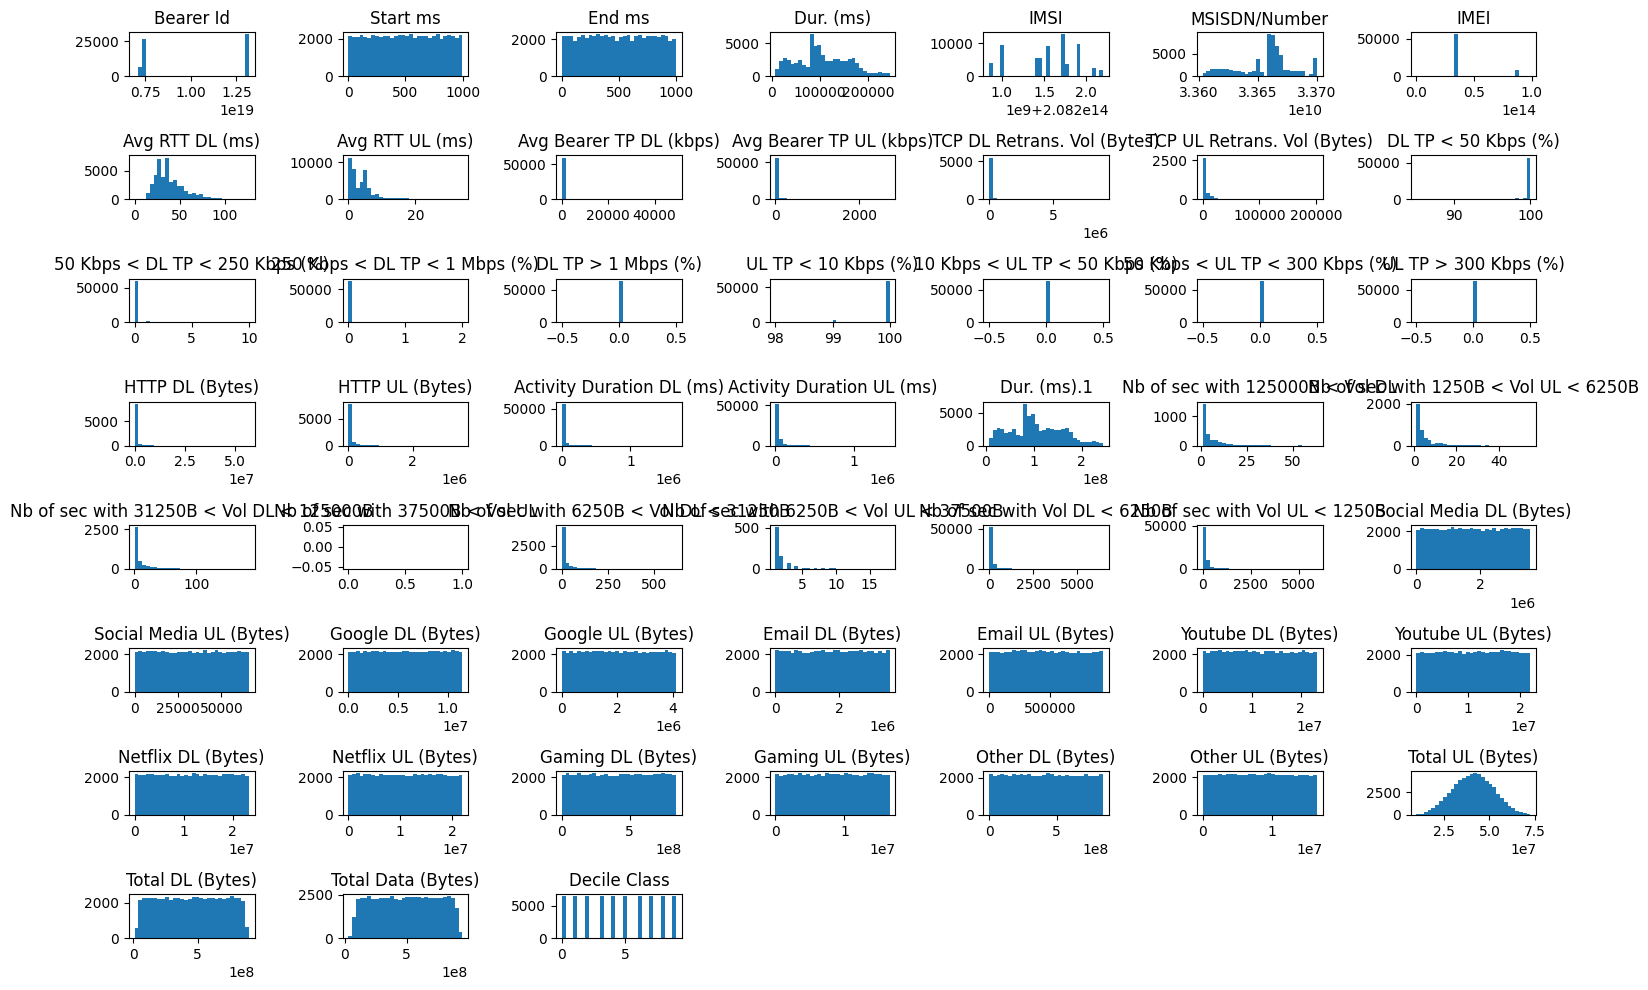

In [218]:
# Plot histograms for quantitative variables
df_cleaned.hist(bins=30, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

# # Use seaborn for more advanced plots
# for col in df_cleaned.select_dtypes(include=[np.float64, np.int64]):
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [219]:
print(df_cleaned.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


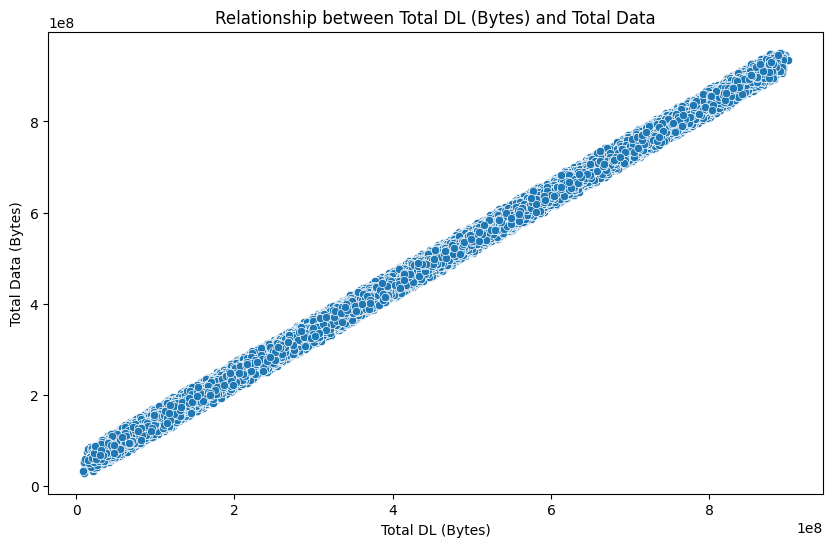

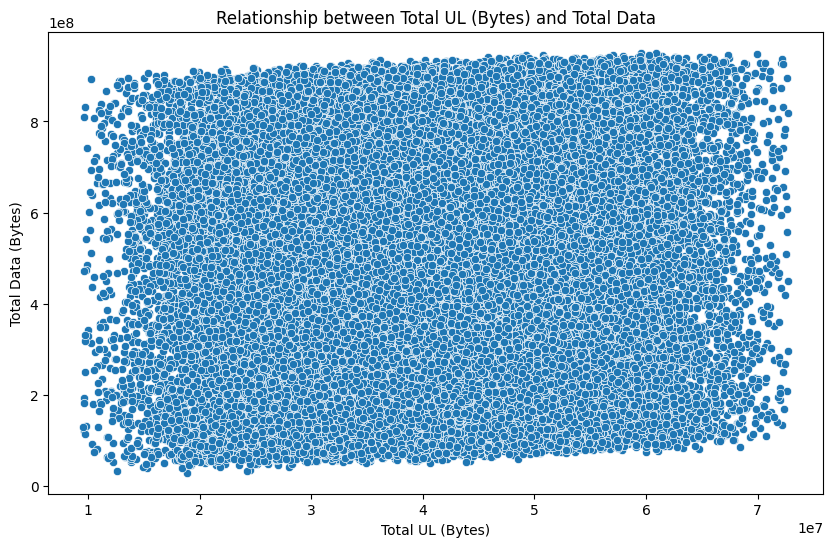

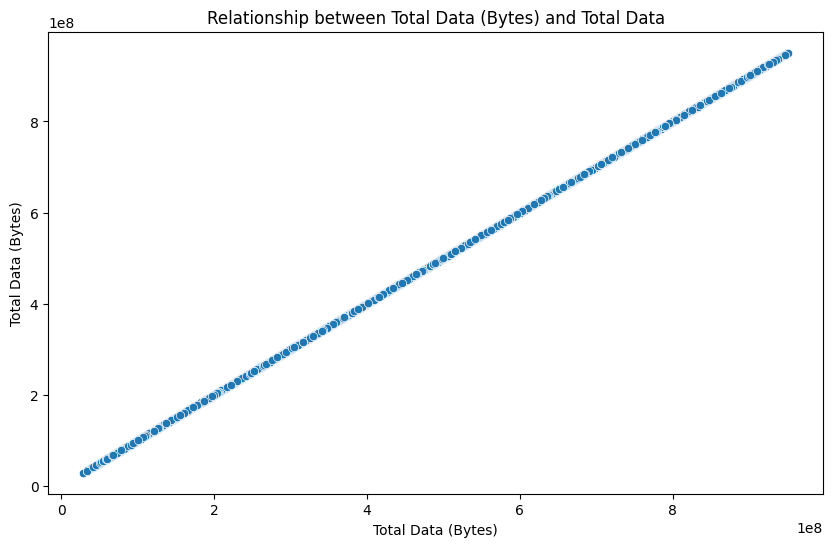

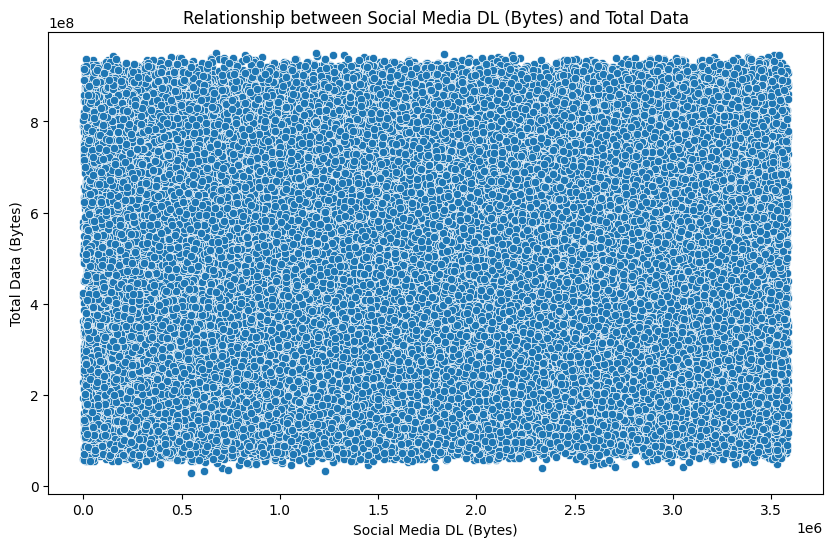

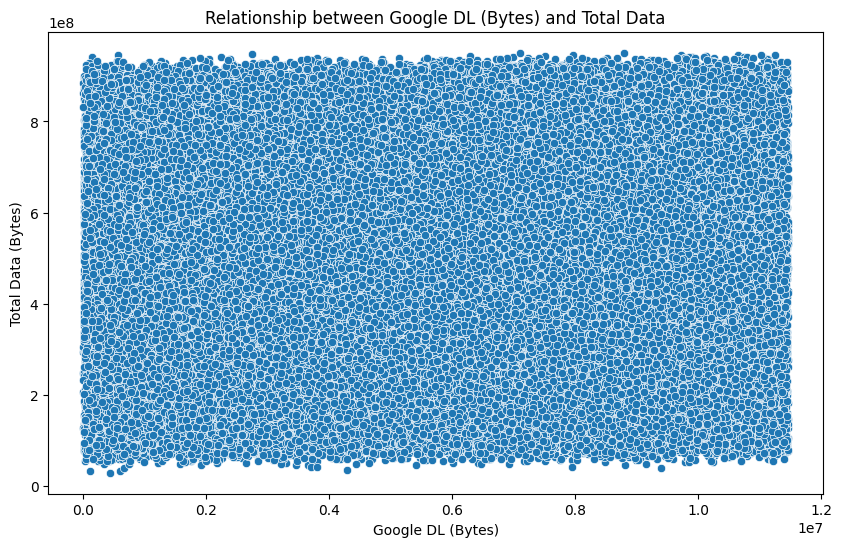

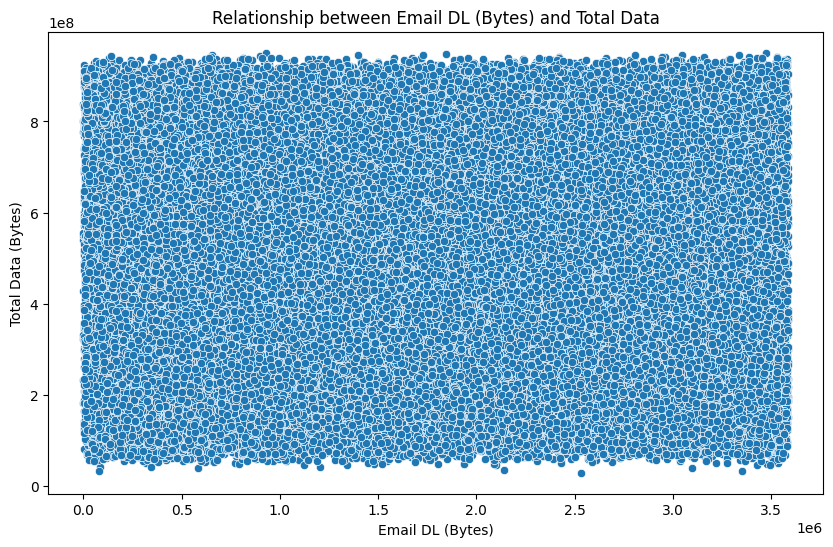

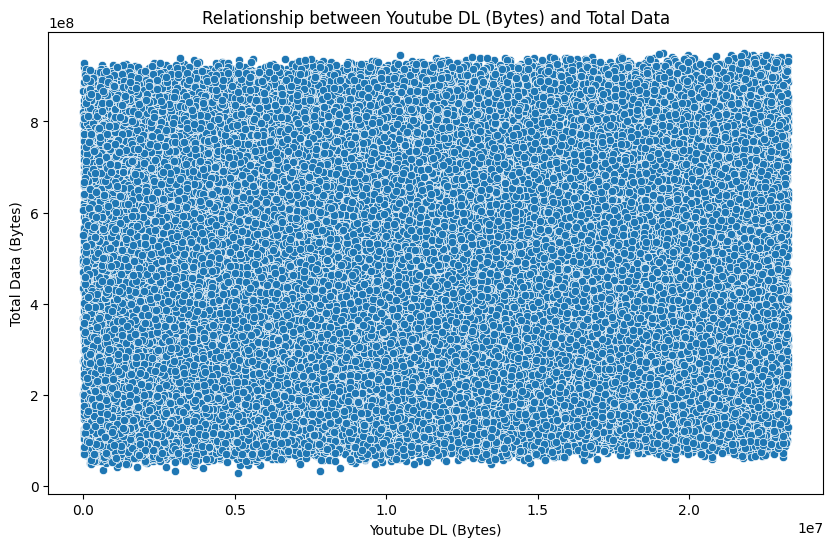

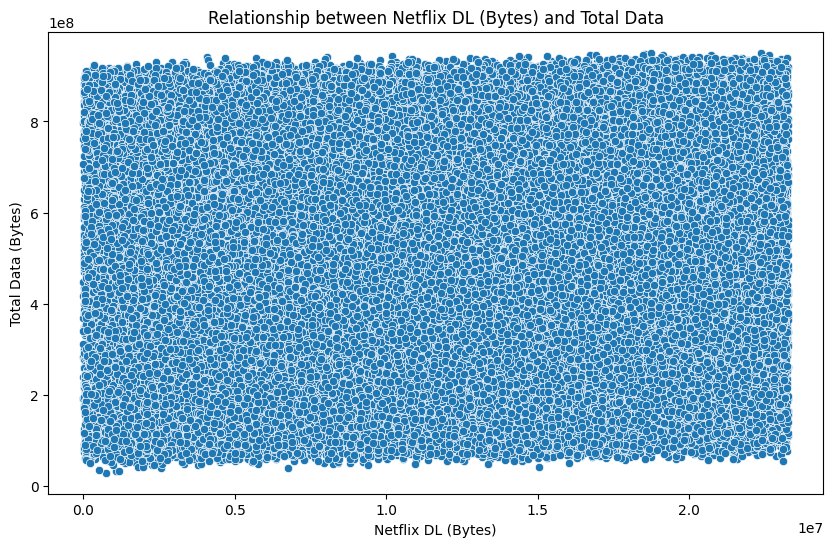

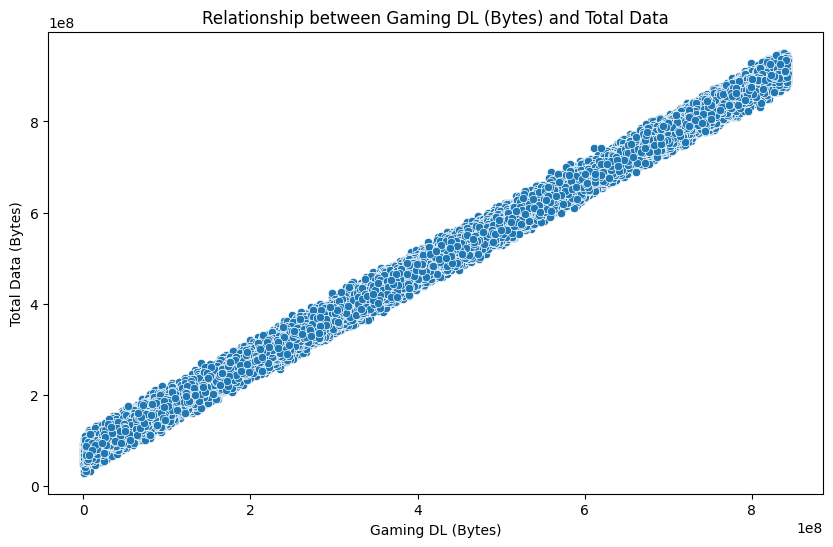

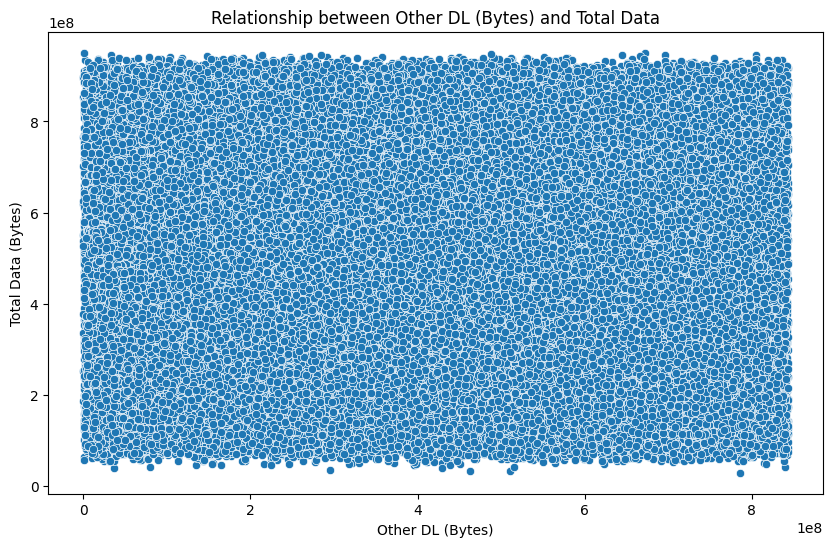

In [220]:
# Analyze relationships between each application and total data
applications = ['Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Create scatter plots or correlation heatmap
for app in applications:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x=app, y='Total Data (Bytes)')
    plt.title(f'Relationship between {app} and Total Data')
    plt.xlabel(app)
    plt.ylabel('Total Data (Bytes)')
    plt.show()

In [221]:
print(df_cleaned.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


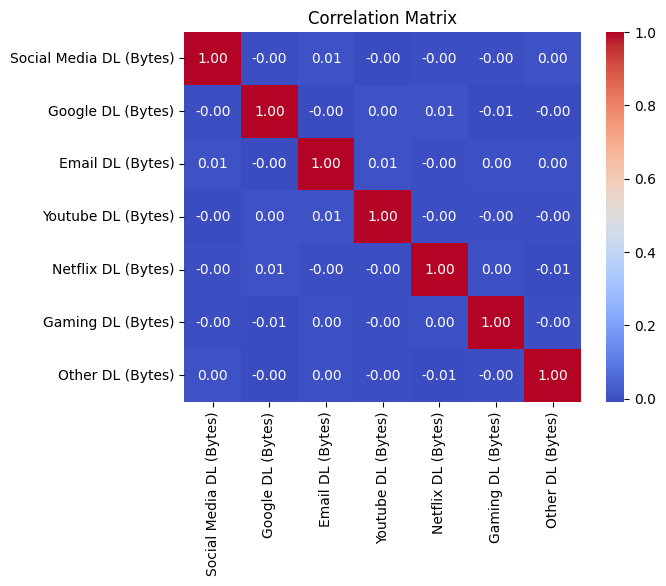

In [222]:
# Compute the correlation matrix
correlation_matrix = df_cleaned[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Interpretation of correlations:
# - Report on strong positive/negative correlations between applications.


In [224]:
from sklearn.decomposition import PCA

# Select numerical features for PCA
X = df_cleaned.select_dtypes(include=[np.float64, np.int64])

# Normalize the data
X_normalized = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation of PCA results:
# - The first principal component captures the most variance.
# - PCA can help in reducing features while retaining essential information.
# - Clusters may indicate similar user behavior patterns.
# - It can guide feature selection for further analysis.


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values